<a href="https://colab.research.google.com/github/SuddhaswattaMaityUK/linear-regression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Simple Linear Regresion 1-D

## Generate Data

In [2]:
x, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=1,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run


In [3]:
# Scale feature x (years of experience) to range 0..20
x = np.interp(x, (x.min(), x.max()), (0, 20))

# Scale target y (salary) to range 20000..150000 
y = np.interp(y, (y.min(), y.max()), (20000, 150000))

In [4]:
x = np.squeeze(x)
y = np.squeeze(y)

Text(0, 0.5, 'salary')

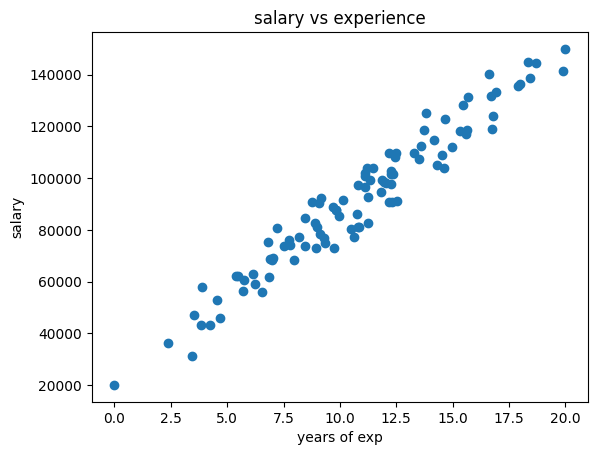

In [5]:
plt.scatter(x,y)
plt.title('salary vs experience')
plt.xlabel('years of exp')
plt.ylabel('salary')

## Minimize Cost Function
J = $ \Sigma_{i=1}^n({y}-\hat{y})^2$

Take partial derivative to minimize error  

w.r.t a is $\frac{\partial J}{\partial a} = 0$ ;  
w.r.t b is $\frac{\partial J}{\partial b} = 0$  


Below are the results of derviative:

$$a = {\Sigma_{i=1}^n{y_{i}}{x_{i}}-\overline{y}\Sigma_{i=1}^n{x_{i}} \over \Sigma_{i=1}^n{x_{i}}^2-\overline{x}\Sigma_{i=1}^n x_{i}} $$

$$b = {\overline y\Sigma_{i=1}^n{x_{i}}^2-\overline{x}\Sigma_{i=1}^n{x_{i}y_{i}} \over \Sigma_{i=1}^n{x_{i}}^2-\overline{x}\Sigma_{i=1}^n x_{i}} $$

In [6]:
den = x.dot(x) - x.mean()*x.sum()

In [7]:
a =( x.dot(y) - y.mean()*x.sum() )/ den

In [8]:
b = (y.mean()*x.dot(x) - x.mean()*x.dot(y)) / den

In [9]:
y_hat = a*x + b

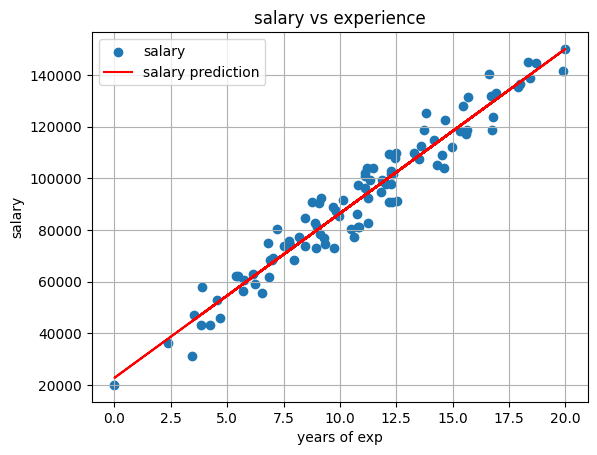

In [10]:
plt.scatter(x,y,label='salary')
plt.plot(x,y_hat,color='r',label='salary prediction')
plt.title('salary vs experience')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.legend()
plt.grid()

## R squared method
$$R^2 = 1 - {\Sigma_{i=1}^n({y}-\hat{y})^2 \over \Sigma_{i=1}^n({y}-\overline{y})^2} $$

In [11]:
residual = y - y_hat
total = y - y.mean()
sum_of_residual = residual.dot(residual)
sum_of_total = total.dot(total)

In [12]:
r_squared = 1 - (sum_of_residual/sum_of_total)

In [13]:
r_squared

0.9417294727711081

# Moore's Law  : Example for Log transformation


## Load kaggle dataset

In [14]:
def mount_kaggle():
  from google.colab import drive
  from google.colab import files
  drive.mount('/content/gdrive')
  files.upload()
  !ls -lha kaggle.json
  !pip install -q kaggle
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/
  !chmod 600 /root/.kaggle/kaggle.json
  !pwd

In [15]:
mount_kaggle()

Mounted at /content/gdrive


Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 73 Apr 18 16:41 kaggle.json
/content


In [16]:
!kaggle datasets download -d yvtsanlevy/moore-law
!unzip moore-law.zip

  0% 0.00/701 [00:00<?, ?B/s]
100% 701/701 [00:00<00:00, 683kB/s]
Archive:  moore-law.zip
  inflating: moore.csv               


In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('/content/moore.csv',header=None,names=['year','transistor_count'])

In [19]:
df.head()

,year,transistor_count
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [20]:
X = df['year'].values

In [21]:
Y = df['transistor_count'].values

Text(0.5, 1.0, "Moore's Law")

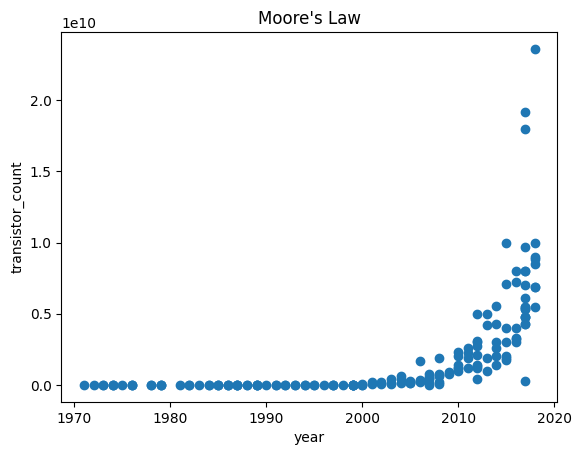

In [22]:
plt.scatter(X,Y)
plt.ylabel('transistor_count')
plt.xlabel('year')
plt.title("Moore's Law")

Text(0.5, 1.0, 'logatithmic transformation')

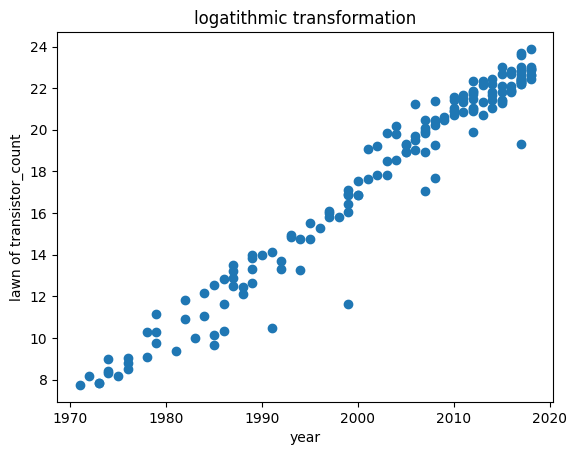

In [23]:
plt.scatter(X,np.log(Y))
plt.ylabel('lawn of transistor_count')
plt.xlabel('year')
plt.title('logatithmic transformation')

## Log Transform transistor count

In [24]:
Y = np.log(Y)

## Minimize Cost Function(Moore's Law)
J = $ \Sigma_{i=1}^n({y}-\hat{y})^2$

Take partial derivative to minimize error  

w.r.t a is $\frac{\partial E}{\partial a} = 0$ ;  
w.r.t b is $\frac{\partial E}{\partial b} = 0$  


Below are the results of derviative:

$$a = {\Sigma_{i=1}^n{y_{i}}{x_{i}}-\overline{y}\Sigma_{i=1}^n{x_{i}} \over \Sigma_{i=1}^n{x_{i}}^2-\overline{x}\Sigma_{i=1}^n x_{i}} $$

$$b = {\overline y\Sigma_{i=1}^n{x_{i}}^2-\overline{x}\Sigma_{i=1}^n{x_{i}y_{i}} \over \Sigma_{i=1}^n{x_{i}}^2-\overline{x}\Sigma_{i=1}^n x_{i}} $$

In [25]:
den = X.dot(X) - X.mean()*X.sum()

In [26]:
A =( X.dot(Y) - Y.mean()*X.sum() )/ den

In [27]:
B = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y)) / den

In [28]:
Y_hat = A*X + B

Text(0.5, 1.0, 'Transistor Count Prediction')

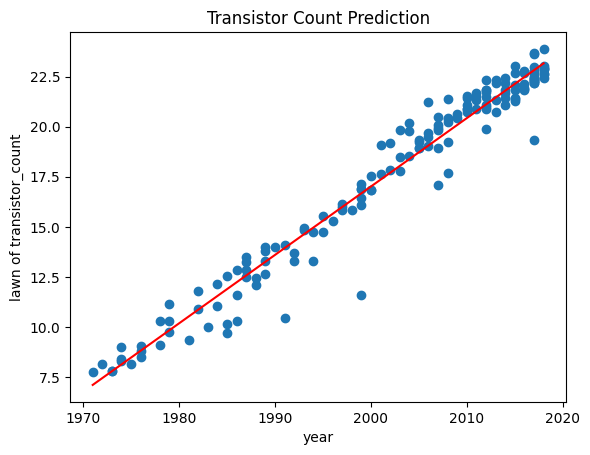

In [29]:
plt.scatter(X,Y,label='Transistor Count')
plt.plot(X,Y_hat,color='r',label='Predicted Transistor Count')
plt.ylabel('lawn of transistor_count')
plt.xlabel('year')
plt.title('Transistor Count Prediction')

In [30]:
print(f'Time to double = {np.log(2)/A} years')

Time to double = 2.028629520529002 years


*What is the transistor count for year 2000?*


In [31]:
year = 2017

In [32]:
np.exp(year*A)*np.exp(B)

8161418832.680725

In [33]:
df[df['year']==year].mean()

year                2.017000e+03
transistor_count    7.105882e+09
dtype: float64

## R squared : Moore's Law
$$R^2 = 1 - {\Sigma_{i=1}^n({y}-\hat{y})^2 \over \Sigma_{i=1}^n({y}-\overline{y})^2} $$

In [34]:
residual = Y - Y_hat
total = Y - Y.mean()
sum_of_residual = residual.dot(residual)
sum_of_total = total.dot(total)

In [35]:
r_squared = 1 - (sum_of_residual/sum_of_total)

In [36]:
r_squared

0.9615197274213099

# Multilinear Regression

## Generate Data for Multi-linear Regression

In [37]:
X,Y,coeff = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=2,#number of features
                                      n_informative=1,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run


In [38]:
bias = np.ones((100,1))

In [39]:
X = np.hstack((X,bias))

In [40]:
print(X.shape,Y.shape)

(100, 3) (100,)


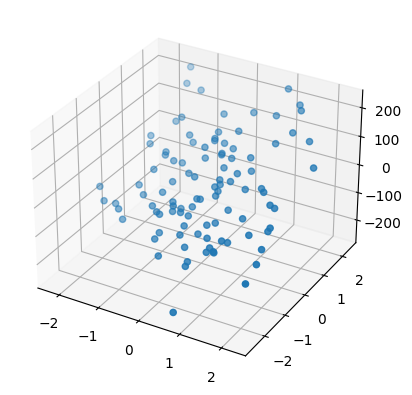

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)


## Minimize Cost Function

Prediction  $ \hat{y} = ωx $

$$ J = Σ_{i=1}^n (y-\hat{y})^2$$  

$$ J = Σ_{i=1}^n (y-ωx)^2$$

$$ J = (y-ωx)^{T}(y-ωx)$$  

$$ J = yy^{T} - 2yωx^{T} - ω^{T}ωx^{T}x $$


Taking partial derivative 
$$ \frac{\partial J}{\partial w} = 0 $$

We get
$$ (XX{^T})^{-1}(XX{^T})ω = { (YX^T)(XX{^T})^{-1} } $$  

$$ Iω = { (XX{^T})^{-1}(YX^T) } $$

In [42]:
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))

In [43]:
Y_hat = np.dot(X,w)

## R squared for Multi-linear regression
$$ R^{2} = 1 - { SS_{res} \over SS_{total} } $$

In [44]:
def calculate_r_squared(Y,Y_hat):
  residual = Y - Y_hat
  total = Y - Y.mean()
  sum_of_residual = residual.dot(residual)
  sum_of_total = total.dot(total)
  r_squared = 1 - (sum_of_residual/sum_of_total)
  return r_squared


In [45]:
calculate_r_squared(Y,Y_hat)

0.9908623731485031

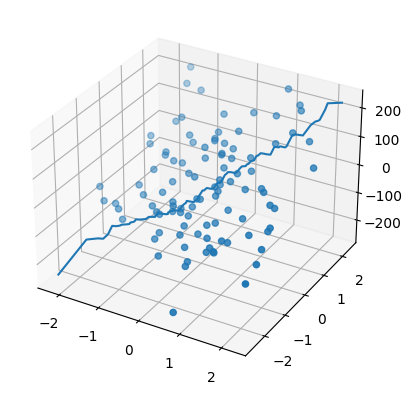

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.plot(sorted(X[:,0]),sorted(X[:,1]),sorted(Y_hat))

# Systolic Blood Pressure

## Download Data

In [58]:
!wget https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls

--2023-04-18 16:55:05--  https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls
Resolving college.cengage.com (college.cengage.com)... 69.32.208.108
Connecting to college.cengage.com (college.cengage.com)|69.32.208.108|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 751 [application/vnd.ms-excel]
Saving to: ‘mlr02.xls’

mlr02.xls           100%[===================>]     751  --.-KB/s    in 0s      

2023-04-18 16:55:05 (16.3 MB/s) - ‘mlr02.xls’ saved [751/751]



In [110]:
df = pd.read_excel('mlr02.xls',engine='xlrd',names=['blood_pressure','age','weight'])

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


In [111]:
df.head()

,blood_pressure,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


In [112]:
X = df.iloc[:,1:].values

In [113]:
Y=df.iloc[:,0].values

In [114]:
print(X.shape , Y.shape)

(11, 2) (11,)


## Plot Age and Weights

Text(0.5, 1.0, 'blood pressure basis of age')

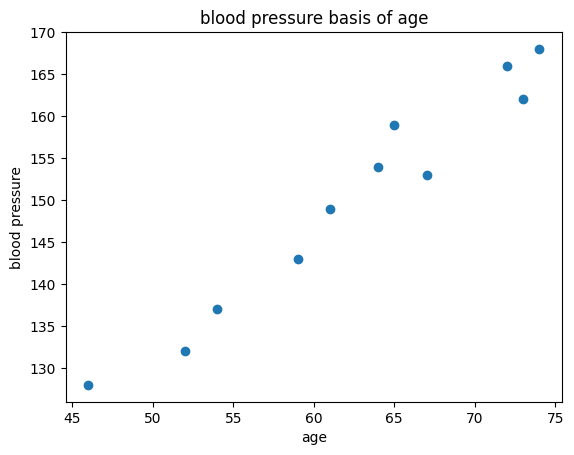

In [115]:
plt.scatter(X[:,0],Y)
plt.xlabel('age')
plt.ylabel('blood pressure')
plt.title('blood pressure basis of age')

Text(0.5, 1.0, 'blood pressure basis of weight')

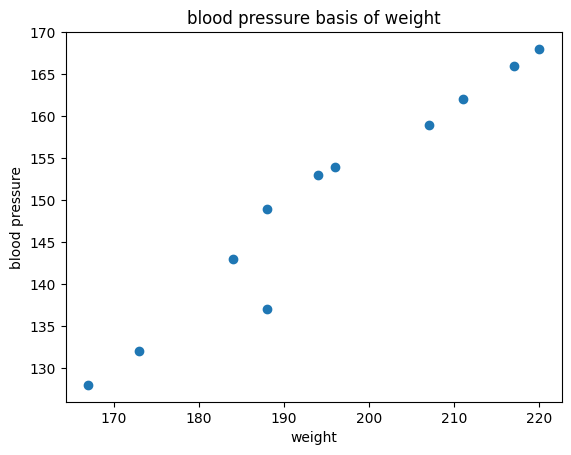

In [116]:
plt.scatter(X[:,1],Y)
plt.xlabel('weight')
plt.ylabel('blood pressure')
plt.title('blood pressure basis of weight')

## Add Bias term

In [117]:
bias = np.ones((X.shape[0],1))

In [118]:
X = np.hstack((X,bias))

In [119]:
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))

## Calculate $\hat{y}$

In [120]:
Y_hat = np.dot(X,w)

## Calculate $R^{2}$

In [121]:
calculate_r_squared(Y=Y,Y_hat=Y_hat)

0.9768471041502091

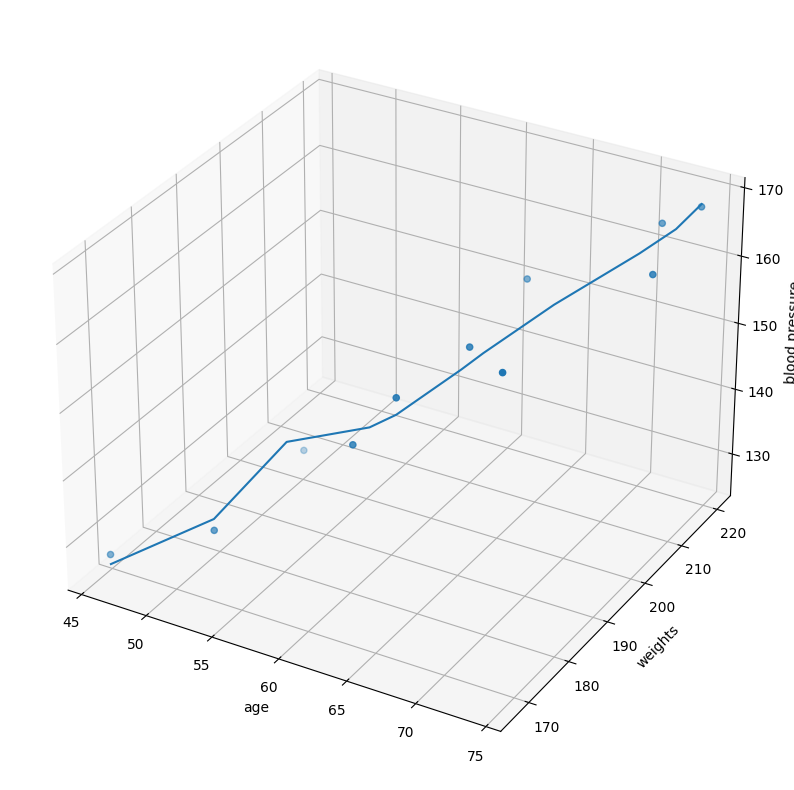

In [134]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.set_xlabel('age')
ax.set_ylabel('weights')
ax.set_zlabel('blood pressure')
ax.plot(sorted(X[:,0]),sorted(X[:,1]),sorted(Y_hat))